In [13]:
import matplotlib                                                                                                                                                                                                                                                                                  
import numpy as np
from silc.foregrounds import fgNoises
import silc.ilc as ilc
import silc.cosmology as csmo
import sys,os
from configparser import SafeConfigParser
import pickle as pickle
from orphics.io import dict_from_section, list_from_config
%pylab inline
                                                                                                                               
cosmo = csmo.Cosmology()

iniFile = "input/exp_config.ini"
Config = SafeConfigParser()
Config.optionxform=str
Config.read(iniFile)

fgs = fgNoises(cosmo.c,ksz_battaglia_test_csv="data/ksz_template_battaglia.csv",tsz_battaglia_template_csv="data/sz_template_battaglia.csv")

cf = 0
constraint_tag = ['','_constrained']

experimentName = "CCATp-v1-40"#"CCATpSOg-v1-40"                                                                                                                

beams = list_from_config(Config,experimentName,'beams')
noises = list_from_config(Config,experimentName,'noises')
freqs = list_from_config(Config,experimentName,'freqs')
lmax = int(Config.getfloat(experimentName,'lmax'))
lknee = list_from_config(Config,experimentName,'lknee')[0]
alpha = list_from_config(Config,experimentName,'alpha')[0]
fsky = Config.getfloat(experimentName,'fsky')
try:
        v3mode = Config.getint(experimentName,'V3mode')
except:
        v3mode = -1

try:
        noatm = Config.getint(experimentName,'noatm')
except:
        noatm = False

print (lmax,v3mode,noatm)

fsky = 0.4

#initialize ILC
ILC  = ilc.ILC_simple(cosmo,fgs, rms_noises = noises,fwhms=beams,freqs=freqs,lmax=lmax,lknee=lknee,alpha=alpha,v3mode=v3mode,fsky=fsky,noatm=noatm,name1='rsxee',name2='cmb', add='yes')
#ILC  = ilc.ILC_simple(cosmo,fgs, rms_noises = noises,fwhms=beams,freqs=freqs,lmax=lmax,lknee=lknee,alpha=alpha,v3mode=v3mode,fsky=fsky,noatm=noatm,name2='cmb',add=True)

#set ells                                                                                                                                                      
#lsedges = np.arange(10,3001,50)

Populating the interactive namespace from numpy and matplotlib
Generating theory Cls...


/Users/nab/anaconda/lib/python3.7/site-packages/ipykernel_launcher.py:15: DeprecationWarning: The SafeConfigParser class has been renamed to ConfigParser in Python 3.2. This alias will be removed in future versions. Use ConfigParser directly instead.
  from ipykernel import kernelapp as app


8000 5 False
V3 flag enabled.
CCATP
Replacing  [27.0, 39.0, 90.0, 150.0, 220.0, 270.0]  with  [222. 280. 348. 405. 850.]
Replacing  [7.75, 5.65, 2.4, 1.55, 1.05, 0.85]  with  [0.95       0.75       0.58333333 0.5        0.23333333]
Using  0.4  for fsky


In [ ]:
ell = np.arange(2,4901,1)
ell2 = np.arange(2,3000,1)
c = ["#027ac9",
"#e2ba00",
"#be099d",
"#7b397c"]

plt.figure()
cl,nl,sn = ILC.Rayleigh_forecast(3000.)
print (sn)
plt.loglog(ell,cl,color=c[0])
plt.plot(ell2,nl,'--',color=c[0])
cl,nl,sn = ILC.Rayleigh_forecast(3000.,type='te')
print (sn)
plt.plot(ell,cl,color=c[1])
plt.plot(ell2,nl,'--',color=c[1])
cl,nl,sn = ILC.Rayleigh_forecast(3000.,type='et')
print (sn)
plt.plot(ell,cl,color=c[2])
plt.plot(ell2,nl,'--',color=c[2])
cl,nl,sn = ILC.Rayleigh_forecast(3000.,type='ee')
print (sn)
plt.plot(ell,cl,color=c[3])
plt.plot(ell2,nl,'--',color=c[3])

0.7356162324142129
0.6832824340364209
0.08580289391928297
0.23306261933485692
[1.48467369e-10 7.17075445e-11 4.15574659e-11 ... 2.15909321e-17
 2.15933760e-17 2.15958211e-17] [1.34250590e-17 1.36541730e-17 1.39444620e-17 ... 2.96975577e-17
 2.97026934e-17 2.97078307e-17]


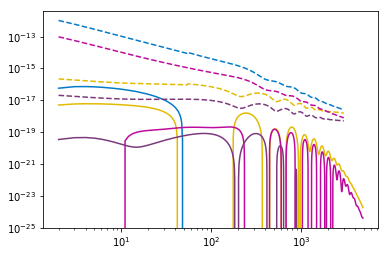

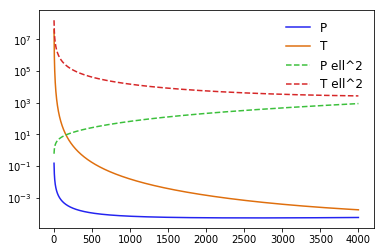

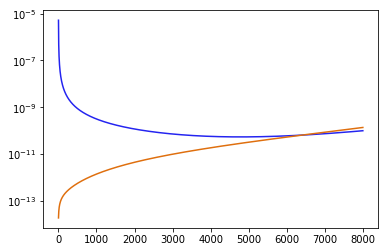

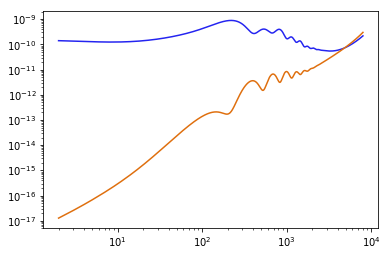

In [14]:
lat_lmax = 4000

import silc.ccat_noise_200306 as ccatp
ccat = ccatp.CcatLatv2('baseline',survey_years=4000/24./365.24,survey_efficiency = 1.0)
ell_CC, N_ell_CC_T_full,N_ell_CC_P_full = ccat.get_noise_curves(fsky, lat_lmax, 1, full_covar=False, deconv_beam=True)

plt.figure()
plt.semilogy(ell_CC,N_ell_CC_P_full[0,:],label='P')
plt.plot(ell_CC,N_ell_CC_T_full[0,:],label='T')
plt.plot(ell_CC,N_ell_CC_P_full[0,:]*ell_CC**2,'--',label='P ell^2')
plt.plot(ell_CC,N_ell_CC_T_full[0,:]*ell_CC**2,'--',label='T ell^2')
leg = legend(loc=0,prop={"size":12})
leg.draw_frame(False)

plt.figure()
plt.plot(ILC.evalells,ILC.nells[:,fq,fq]*(ILC.evalells)*(ILC.evalells+1)/(2.*np.pi))
plt.semilogy(ILC.evalells,ILC.nells_pol[:,fq,fq]*(ILC.evalells)*(ILC.evalells+1)/(2.*np.pi))

plt.figure()
plt.plot(ILC.evalells,n*(ILC.evalells)*(ILC.evalells+1)/(2.*np.pi))
plt.loglog(ILC.evalells,npol*(ILC.evalells)*(ILC.evalells+1)/(2.*np.pi))